In [7]:
!pip -q install folium

In [8]:
# 나눔고딕 폰트 설치 및 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped dire

In [9]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
from folium.plugins import HeatMap
import matplotlib.font_manager as fm

In [10]:
# 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

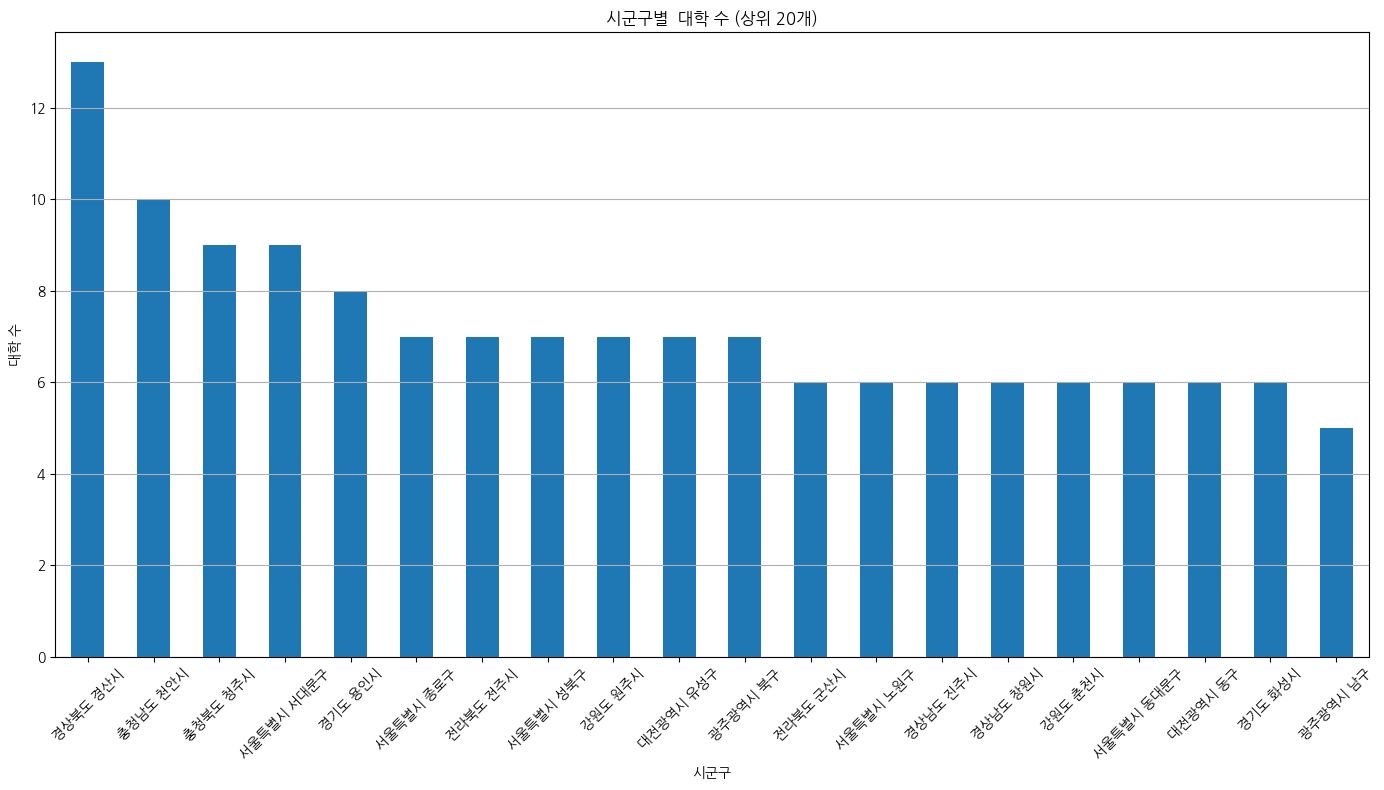

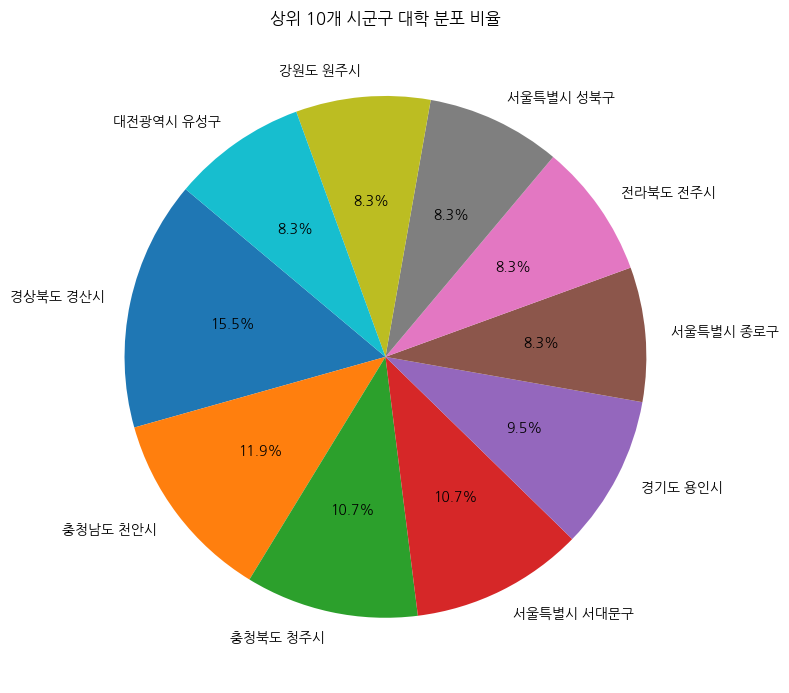

In [11]:


# 1. 데이터 로드
df = pd.read_excel('/content/학교주소좌표.xlsx')
df.columns = ['학교명', '주소', '경도', '위도']

# 2. 시군구 추출 함수 정의
def extract_city_district(address):
    parts = address.split()
    return " ".join(parts[:2]) if len(parts) >= 2 else address

df['시군구'] = df['주소'].apply(extract_city_district)

# 3. 시군구별 학교 수 집계
district_counts = df['시군구'].value_counts().sort_values(ascending=False)

# ───────────────────────────────
#  시군구별 학교 수 막대 그래프
plt.figure(figsize=(14, 8))
district_counts[:20].plot(kind='bar')
plt.title('시군구별  대학 수 (상위 20개)')
plt.xlabel('시군구')
plt.ylabel('대학 수')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



# ───────────────────────────────
# 시군구별 파이 차트 (상위 10개만)
plt.figure(figsize=(8, 8))
district_counts[:10].plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('상위 10개 시군구 대학 분포 비율')
plt.ylabel('')
plt.tight_layout()
plt.show()


In [12]:
# ───────────────────────────────
#  지도 히트맵 시각화
map_center = [df['위도'].mean(), df['경도'].mean()]
heatmap = folium.Map(location=map_center, zoom_start=7)

heat_data = df[['위도', '경도']].values.tolist()
HeatMap(heat_data).add_to(heatmap)

# 지도 결과 반환
heatmap